### **EDA - Análisis Exploratorio de Datos**

Se lleva a cabo el Análisis Exploratorio de Datos `EDA` para cada conjunto de datos resultante del proceso `ETL` en cada uno de los casos. Al analizar estos datos, se obtendrá una comprensión más profunda que permitirá tomar decisiones sobre qué características se utilizarán para entrenar el modelo de recomendación.

In [1]:
#Importando librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. EDA** `steam_games.parquet`

a) *Extracción y revisión de nulos y duplicados*

In [2]:
# Se extrae el dataset que se logró luego del ETL
df_games= pd.read_parquet("data/steam_games.parquet")
df_games

,item_id,app_name,genres,developer,price,release_year
0,761140,Lost Summoner Kitty,Action,Kotoshiro,4.99,2018
1,761140,Lost Summoner Kitty,Casual,Kotoshiro,4.99,2018
2,761140,Lost Summoner Kitty,Indie,Kotoshiro,4.99,2018
3,761140,Lost Summoner Kitty,Simulation,Kotoshiro,4.99,2018
4,761140,Lost Summoner Kitty,Strategy,Kotoshiro,4.99,2018
...,...,...,...,...,...,...
68011,610660,Russian Roads,Indie,Laush Dmitriy Sergeevich,1.99,2018
68012,610660,Russian Roads,Racing,Laush Dmitriy Sergeevich,1.99,2018
68013,610660,Russian Roads,Simulation,Laush Dmitriy Sergeevich,1.99,2018
68014,658870,Exit Directions,Casual,"xropi,stev3ns",4.99,2017


In [3]:
#Se proporciona información acerca del número de columnas y la naturaleza del dato que estas contienen.
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68016 entries, 0 to 68015
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   item_id       68016 non-null  int64  
 1   app_name      67917 non-null  object 
 2   genres        68016 non-null  object 
 3   developer     68016 non-null  object 
 4   price         68016 non-null  float64
 5   release_year  68016 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 3.1+ MB


In [4]:
#Realizamos un recuento de los valores nulos en cada columna.
df_games.isnull().sum()

item_id          0
app_name        99
genres           0
developer        0
price            0
release_year     0
dtype: int64

b) *Tratamiento Variables categóricas*

Feature `genres`

In [5]:
#Se realiza un recuento de los distintos géneros de juegos disponibles en Steam.
cantidad_generos= df_games["genres"].value_counts()
cantidad_generos.to_frame

<bound method Series.to_frame of genres
Indie                        15081
Action                       10637
Casual                        8052
Adventure                     7781
Strategy                      6676
Simulation                    6494
RPG                           5106
Free to Play                  1869
Early Access                  1382
Sports                        1206
Racing                        1048
Massively Multiplayer          993
Design &amp; Illustration      451
Utilities                      319
Web Publishing                 259
Animation &amp; Modeling       172
Education                      122
Video Production               103
Software Training               99
Audio Production                82
Photo Editing                   77
Accounting                       7
Name: count, dtype: int64>

C:\Users\Mayra\AppData\Local\Temp\ipykernel_10580\3570391132.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_games, y='genres', orient='h', palette=("cubehelix"))


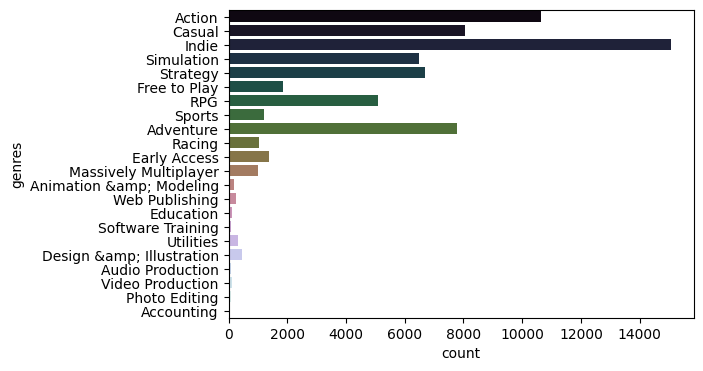

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_games, y='genres', orient='h', palette=("cubehelix"))
plt.show()

**Conclusión**

Los generos que mayor cantidad de veces se repiten son Indie, Action, Casual y Adventure

Feature `item_id`

In [7]:
# se hace recuento de juegos Steam que hay en la plataforma 
cantidad_juegos= len(df_games["item_id"].unique())
cantidad_juegos

27458

**Conclusión** 

La plataforma de juegos Steam contiene 27458 item_id, es decir cantidad de titulos o juegos

Feature `release_year`

In [8]:
#se realiza recuento de los diferentes juegos Steam estrenados por año
games_quantity_years = df_games["release_year"].value_counts()

games_quantity_years

release_year
2017    24596
2016    17289
2015    11319
2014     5805
2013     2832
2012     2024
2011      949
2010      657
2009      475
2008      320
2007      254
2018      235
2006      212
2005      128
2003      117
2001       97
2004       90
1998       72
1999       71
1997       64
2002       60
1996       56
2000       54
1994       51
1995       48
1993       39
1992       24
1991       19
1989       11
1990       11
1988        9
2019        6
1986        5
1984        5
1987        5
2021        3
1983        3
1985        1
Name: count, dtype: int64

C:\Users\Mayra\AppData\Local\Temp\ipykernel_5020\3440260154.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=games_quantity_years.index, y=games_quantity_years.values, palette=("Set2"))


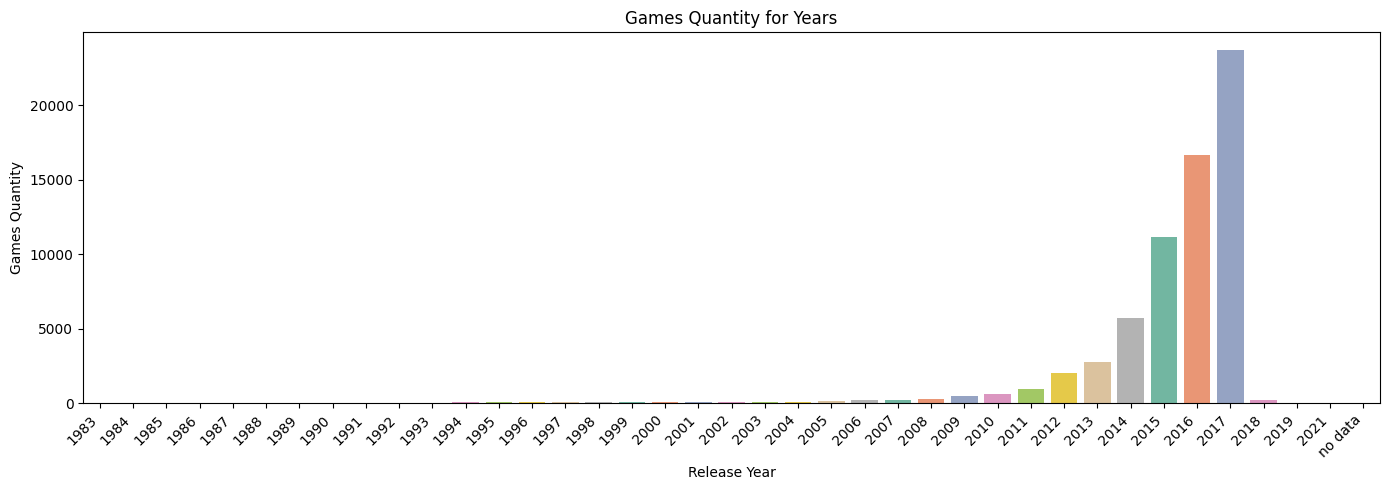

In [9]:
#Reorganizo el marco de datos para que sea posible crear una representación gráfica.

games_quantity_years = games_quantity_years.reindex(["no data"] + list(games_quantity_years.index))

games_quantity_years = games_quantity_years.sort_index()

plt.figure(figsize=(14, 5))

sns.barplot(x=games_quantity_years.index, y=games_quantity_years.values, palette=("Set2"))
plt.xlabel('Release Year') ; plt.ylabel('Games Quantity') ; plt.title('Games Quantity for Years')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Conclusión**

Los lanzamientos de juegos en la plataforma Steam muestran un patrón de concentración entre los años 2003, con un incremento significativo hasta 2017, y una disminución de registros después de ese punto. 2017 fue el año con la mayor cantidad de juegos lanzados.

Feature `developer`

In [9]:
#Se calcula el número de juegos publicados por parte de los desarrolladores.
quantity_developer = df_games["developer"].value_counts()
quantity_developer

developer
Ubisoft - San Francisco                2514
SmiteWorks USA, LLC                    2361
DL Softworks                            495
Ronimo Games                            379
Paradox Development Studio              304
                                       ... 
Vicious Cycle Software, Inc.              1
Lucid Games,Aspyr (Mac &amp; Linux)       1
Xoron GmbH                                1
KrossRails,Dovetail Games                 1
Katatema,Watson                           1
Name: count, Length: 10603, dtype: int64

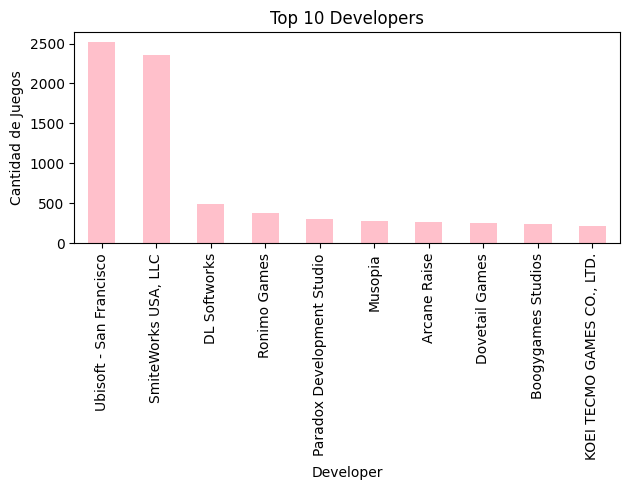

In [10]:
# Generar una representación gráfica que contenga dos subgráficos, colocados uno junto al otro.
plt.figure(figsize=(12, 5))

# El primer subgráfico se dedica a los desarrolladores (publishers).
plt.subplot(1, 2, 1)
quantity_developer[:10].plot(kind='bar', color='pink')
plt.xlabel('Developer') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Developers')

#Mostrar y configurar el espaciado entre los subgráficos.
plt.tight_layout()
plt.show()

**Conclusión**

Los principales desarrolladores de juegos en Steam son Ubisoft y SmiteWorks.

c) Gestión de Variables Numéricas

Feature `price`: Corresponde al precio del juego en la plataforma.

Tratamiento de Outlier

In [11]:
df_games["price"]

0        4.99
1        4.99
2        4.99
3        4.99
4        4.99
         ... 
68011    1.99
68012    1.99
68013    1.99
68014    4.99
68015    4.99
Name: price, Length: 68016, dtype: float64

In [12]:
df_games["price"].value_counts()

price
4.99     9404
9.99     8656
2.99     7543
0.99     6136
1.99     5603
         ... 
14.95       1
42.99       1
26.99       1
99.00       1
27.49       1
Name: count, Length: 135, dtype: int64

In [13]:
#Buscamos valores atípicos en los precios, pero es importante tener en cuenta que los valores pueden variar significativamente debido a ofertas o juegos gratuitos.

# Se calcula el IQR (Rango Intercuartil)
Q1 = df_games['price'].quantile(0.25)
Q3 = df_games['price'].quantile(0.75)
IQR = Q3 - Q1

outliers_info = pd.DataFrame({'Q1': [Q1], 'Q3': [Q3], 'IQR': [IQR]}, index=[0])
outliers_info

,Q1,Q3,IQR
0,2.99,9.99,7.0


In [14]:
#Establecemos el umbral para los valores atípicos.
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

boundaries_df = pd.DataFrame({'Upper Bound': [upper_bound], 'Lower Bound': [lower_bound]})
boundaries_df

,Upper Bound,Lower Bound
0,20.49,-7.51


In [15]:
outliers_upper = df_games[df_games['price'] > upper_bound]
outliers_lower = df_games[df_games['price'] < lower_bound]

In [16]:
outliers_upper.reset_index(drop=True, inplace=True)
outliers_upper

,item_id,app_name,genres,developer,price,release_year
0,774278,Snow All Access Legend Pass,Free to Play,Poppermost Productions,29.99,2018
1,774278,Snow All Access Legend Pass,Indie,Poppermost Productions,29.99,2018
2,774278,Snow All Access Legend Pass,Simulation,Poppermost Productions,29.99,2018
3,774278,Snow All Access Legend Pass,Sports,Poppermost Productions,29.99,2018
4,774279,Snow Lifetime Pack,Free to Play,Poppermost Productions,59.99,2018
...,...,...,...,...,...,...
4042,719590,Mesozoica,Simulation,"DreamInCode B.V.,Squadron Interactive",29.99,2018
4043,719590,Mesozoica,Strategy,"DreamInCode B.V.,Squadron Interactive",29.99,2018
4044,719590,Mesozoica,Early Access,"DreamInCode B.V.,Squadron Interactive",29.99,2018
4045,755310,Cyberlink Youcam Deluxe,Utilities,CyberLink,29.99,2017


In [17]:
outliers_lower.reset_index(drop=True, inplace=True)
outliers_lower

,item_id,app_name,genres,developer,price,release_year


A continuación, generamos dos tipos de gráficos:

- Un `Stripplot` que permite observar la distribución de los precios de los juegos.
- Un `Boxplot` que proporciona un resumen estadístico de estos precios.

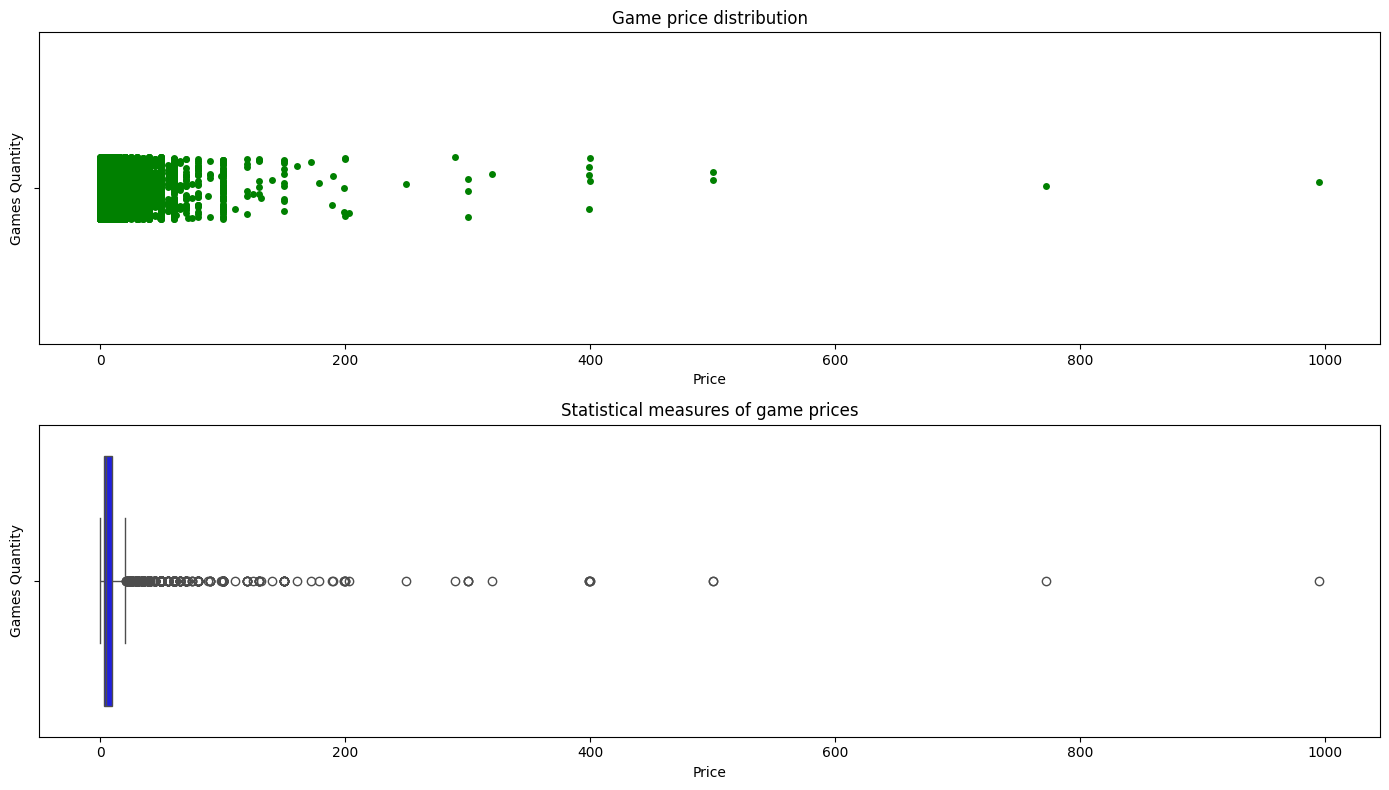

In [21]:
#Recopila los precios de cada juego y crea un marco de datos (dataframe) al respecto.
price = df_games.groupby('item_id')['price'].unique().reset_index().explode('price')

fig = plt.figure(figsize=(14, 8))

#Stripplot para visualizar la distribución de los precios.
axis1 = fig.add_subplot(211)
sns.stripplot(data=price, x='price', ax=axis1, color="green")
axis1.set_xlabel('Price')
axis1.set_ylabel('Games Quantity')
axis1.set_title('Game price distribution')

#Boxplot para representar medidas estadísticas.
axis2 = fig.add_subplot(212, sharex=axis1)
sns.boxplot(data=price, x='price', ax=axis2, color="blue")
axis2.set_xlabel('Price')
axis2.set_ylabel('Games Quantity')
axis2.set_title('Statistical measures of game prices')

#Muestra y ajusta el espaciado entre los subgráficos.
plt.tight_layout()
plt.show()

In [22]:
df_games.describe()

,item_id,price
count,6.614500e+04,66145.000000
mean,4.616991e+05,9.094640
std,1.748304e+05,16.200865
min,1.000000e+01,0.000000
25%,3.404400e+05,2.990000
50%,4.571920e+05,4.990000
75%,5.976100e+05,9.990000
max,2.028850e+06,995.000000


C:\Users\Mayra\AppData\Local\Temp\ipykernel_10580\2858321572.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_games, x='price',palette='Set2')


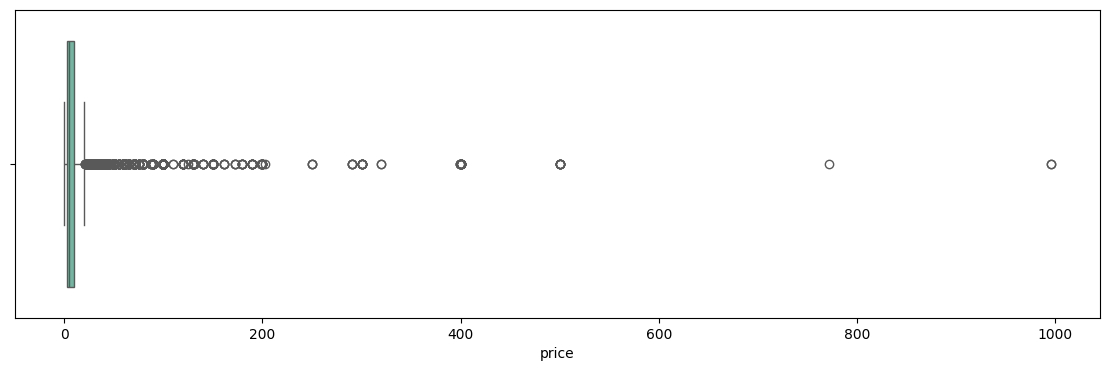

In [18]:
fig = plt.figure(figsize=(14, 4))

sns.boxplot(data=df_games, x='price',palette='Set2')
plt.show()

**Conclusión**

- El precio promedio de los juegos es de 9.09.
- El 50% de los precios de los juegos de Steam se sitúa en un rango de 0 a 4.99.
- El 75% de los precios de los juegos de Steam son inferiores a 9.99.
- El precio máximo alcanza los 995.00.
- Se identifican 4,076 valores atípicos en la parte superior del rango de precios.

#### **2. Exploración de Datos de user_reviews.parquet**

a) Extracción y Evaluación de Valores Nulos y Duplicados

Se procede a recuperar el conjunto de datos resultante después del proceso ETL con el fin de analizar la presencia de valores nulos y duplicados.

In [19]:
df_reviews = pd.read_parquet("data/reviews.parquet")
df_reviews

,user_id,item_id,recommend,posted,sentiment_analisis
0,76561197970982479,1250,True,2011,2
1,76561197970982479,22200,True,2011,2
2,76561197970982479,43110,True,2011,1
3,js41637,251610,True,2014,2
4,js41637,227300,True,2013,1
...,...,...,...,...,...
48493,wayfeng,730,True,2015,1
48494,76561198251004808,253980,True,2015,2
48495,72947282842,730,True,2015,0
48496,ApxLGhost,730,True,2015,2


In [20]:
#Se proporciona información acerca del número de columnas y la naturaleza de los datos que estas contienen.
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48498 entries, 0 to 48497
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             48498 non-null  object
 1   item_id             48498 non-null  int64 
 2   recommend           48498 non-null  bool  
 3   posted              48498 non-null  int64 
 4   sentiment_analisis  48498 non-null  int64 
dtypes: bool(1), int64(3), object(1)
memory usage: 1.5+ MB


Buscamos nulos y duplicados

In [21]:
df_reviews.isnull().sum()

user_id               0
item_id               0
recommend             0
posted                0
sentiment_analisis    0
dtype: int64

b) Manejo de Variables Categóricas

- `user_id`: Es la identificación del usuario en la plataforma.
- `recommend`: Representa un valor booleano que indica si se ha realizado una revisión.
- `sentiment_analysis`: Refleja la clasificación de las revisiones en:

Positivo: 2 Negativo: 0 Neutral: 1

Feature `user_id`

In [22]:
# se contabiliza la cantidad de usuarios de juegos Steam que hay en la plataforma 
quantity_user_reviews = len(df_reviews["user_id"].unique())
quantity_user_reviews

22795

Conclusión

En la plataforma de juegos, existen 22,795 usuarios con identificadores únicos (user_id) registrados.

Feature `recommend`

Se procede a contar la cantidad de recomendaciones realizadas.

In [23]:
recommended_quantity = df_reviews["recommend"].value_counts()
recommended_quantity

recommend
True     43557
False     4941
Name: count, dtype: int64

Conclusión

Los usuarios han efectuado un total de 43,557 recomendaciones, lo que sugiere que cada user_id ha realizado más de una recomendación de juego.

Feature `sentiment_analisis`

In [24]:
#realizo el conteo de cada una de las categorias de sentimientos
quantity_feeling = df_reviews["sentiment_analisis"].value_counts()
quantity_feeling

sentiment_analisis
2    21945
1    20127
0     6426
Name: count, dtype: int64

Conclusión

Hubo 21,945 revisiones con sentimientos positivos, 20,127 revisiones con sentimientos neutrales y 6,426 revisiones con sentimientos negativos.

#### **3. Exploración de Datos de user_items.parquet**

a) Extracción y Evaluación de Valores Nulos y Duplicados

Se procede a recuperar el conjunto de datos resultante después del proceso ETL con el objetivo de analizar la existencia de valores nulos y duplicados.

In [25]:
df_items=pd.read_parquet("data/user_items.parquet")
df_items

,user_id,item_id,playtime_forever
0,76561197970982479,10,6
1,76561197970982479,30,7
2,76561197970982479,300,4733
3,76561197970982479,240,1853
4,76561197970982479,3830,333
...,...,...,...
3246357,76561198329548331,304930,677
3246358,76561198329548331,227940,43
3246359,76561198329548331,388490,3
3246360,76561198329548331,521570,4


In [26]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3246362 entries, 0 to 3246361
Data columns (total 3 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   item_id           int64 
 2   playtime_forever  int64 
dtypes: int64(2), object(1)
memory usage: 74.3+ MB


In [27]:
df_items.describe()

,item_id,playtime_forever
count,3.246362e+06,3.246362e+06
mean,1.771685e+05,1.554285e+03
std,1.266634e+05,6.717154e+03
min,1.000000e+01,1.000000e+00
25%,3.912000e+04,4.400000e+01
50%,2.149500e+05,2.050000e+02
75%,2.630200e+05,8.080000e+02
max,5.286600e+05,6.427730e+05


In [28]:
df_items.isnull().sum()

user_id             0
item_id             0
playtime_forever    0
dtype: int64

b) Gestión de Variables Numéricas

- playtime_forever: Representa la cantidad de tiempo que un usuario juega.

Feature `playtime_forever`

In [29]:
#Agrupa a los usuarios por tiempo, almacena esta información en un nuevo marco de datos y ordena los resultados.
time_count = df_items.groupby('user_id')['playtime_forever'].unique().explode()
time_count= pd.DataFrame(time_count)
time_count_user = time_count.sort_values('playtime_forever', ascending=False)
time_count_user

,playtime_forever
user_id,
wolop,642773
Evilutional,635295
76561198019826668,632452
76561198039832932,613411
tsunamitad,600068
...,...
76561198078062945,1
76561198101995099,1
76561198066935199,1


C:\Users\Mayra\AppData\Local\Temp\ipykernel_10580\1007933754.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=time_count_user, x='playtime_forever', ax=ax2, palette="plasma")


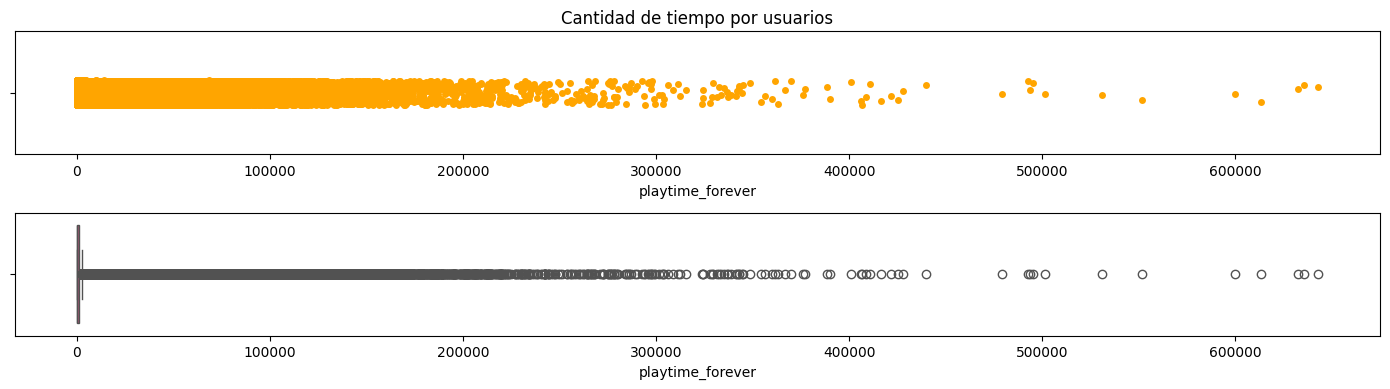

In [30]:
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=time_count_user, x='playtime_forever', ax=ax1, color="orange")
ax1.set_xlabel('playtime_forever') ; ax1.set_title('Cantidad de tiempo por usuarios')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=time_count_user, x='playtime_forever', ax=ax2, palette="plasma")
ax2.set_xlabel('playtime_forever')

#Muestra y ajusta el espaciado entre los subgráficos.
plt.tight_layout()
plt.show()

In [31]:
time_count_user.describe()

,playtime_forever
count,2823404
unique,48860
top,1
freq,35796


Conclusión

La cantidad total de tiempo jugado o consumido es de 2,823,404 minutos, lo que equivale a aproximadamente 47 horas y 56 minutos. El valor que más se repite (48,860 veces) es 1, lo que sugiere que la mayoría de los usuarios llega a jugar una hora.

El usuario con el user_id "wolop" ha registrado el mayor tiempo de juego en Steam, con un total de 642,773 minutos, seguido de "Evilutional" con 635,295 minutos y "76561198019826668" muy cerca, con 632,452 minutos.


Preparación de dataset para el modelo de recomendación

In [32]:
modelo_item= pd.read_parquet("data/steam_games.parquet")
modelo_item

,item_id,app_name,genres,developer,price,release_year
0,761140,Lost Summoner Kitty,Action,Kotoshiro,4.99,2018
1,761140,Lost Summoner Kitty,Casual,Kotoshiro,4.99,2018
2,761140,Lost Summoner Kitty,Indie,Kotoshiro,4.99,2018
3,761140,Lost Summoner Kitty,Simulation,Kotoshiro,4.99,2018
4,761140,Lost Summoner Kitty,Strategy,Kotoshiro,4.99,2018
...,...,...,...,...,...,...
68011,610660,Russian Roads,Indie,Laush Dmitriy Sergeevich,1.99,2018
68012,610660,Russian Roads,Racing,Laush Dmitriy Sergeevich,1.99,2018
68013,610660,Russian Roads,Simulation,Laush Dmitriy Sergeevich,1.99,2018
68014,658870,Exit Directions,Casual,"xropi,stev3ns",4.99,2017


In [33]:
# Creo un dataframe con las columnas que voy a utilizar item_id,app_name y genres
modelo_item= modelo_item[["item_id", "app_name", "genres"]]
modelo_item

,item_id,app_name,genres
0,761140,Lost Summoner Kitty,Action
1,761140,Lost Summoner Kitty,Casual
2,761140,Lost Summoner Kitty,Indie
3,761140,Lost Summoner Kitty,Simulation
4,761140,Lost Summoner Kitty,Strategy
...,...,...,...
68011,610660,Russian Roads,Indie
68012,610660,Russian Roads,Racing
68013,610660,Russian Roads,Simulation
68014,658870,Exit Directions,Casual


In [34]:
#Se procede a buscar nulos
modelo_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68016 entries, 0 to 68015
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   68016 non-null  int64 
 1   app_name  67917 non-null  object
 2   genres    68016 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


Generando el archivo necesario para el proceso de modelado.

In [35]:
modelo_item.to_parquet("data/modelo_item.parquet")